In [1]:
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib

In [2]:
df=sns.load_dataset("penguins")

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
df.dropna(inplace=True)

In [9]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
df["species"].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [6]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [7]:
num_columns=df[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']].columns.tolist()
cat_columns = df[['island', 'sex']].columns.tolist()

In [8]:
num_columns

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [9]:
cat_columns

['island', 'sex']

In [10]:
dataset=df[['species', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g','island','sex']]

In [11]:
dataset

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island,sex
0,Adelie,39.1,18.7,181.0,3750.0,Torgersen,Male
1,Adelie,39.5,17.4,186.0,3800.0,Torgersen,Female
2,Adelie,40.3,18.0,195.0,3250.0,Torgersen,Female
4,Adelie,36.7,19.3,193.0,3450.0,Torgersen,Female
5,Adelie,39.3,20.6,190.0,3650.0,Torgersen,Male
...,...,...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0,Biscoe,Female
340,Gentoo,46.8,14.3,215.0,4850.0,Biscoe,Female
341,Gentoo,50.4,15.7,222.0,5750.0,Biscoe,Male
342,Gentoo,45.2,14.8,212.0,5200.0,Biscoe,Female


In [12]:
dataset=dataset[dataset["species"]!="Chinstrap"]

In [13]:
dataset["species"].value_counts()

species
Adelie    146
Gentoo    119
Name: count, dtype: int64

In [14]:
x=dataset.drop("species",axis=1)
y=dataset[["species"]]

In [15]:
x

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island,sex
0,39.1,18.7,181.0,3750.0,Torgersen,Male
1,39.5,17.4,186.0,3800.0,Torgersen,Female
2,40.3,18.0,195.0,3250.0,Torgersen,Female
4,36.7,19.3,193.0,3450.0,Torgersen,Female
5,39.3,20.6,190.0,3650.0,Torgersen,Male
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,Biscoe,Female
340,46.8,14.3,215.0,4850.0,Biscoe,Female
341,50.4,15.7,222.0,5750.0,Biscoe,Male
342,45.2,14.8,212.0,5200.0,Biscoe,Female


In [16]:
y

,species
0,Adelie
1,Adelie
2,Adelie
4,Adelie
5,Adelie
...,...
338,Gentoo
340,Gentoo
341,Gentoo
342,Gentoo


In [17]:
y_encoder=LabelEncoder()
cat_encoder=OneHotEncoder(sparse_output=False,drop="first")
num_scaler=StandardScaler()

In [18]:
y_encoder

LabelEncoder()

In [19]:
cat_encoder

OneHotEncoder(drop='first', sparse_output=False)

In [20]:
num_scaler

StandardScaler()

In [21]:
y_encoded=y_encoder.fit_transform(y)

C:\Users\jothe\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [23]:
cat_encoded=cat_encoder.fit_transform(x[cat_columns])

In [24]:
cat_encoded

array([[0., 1., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 1.],
       [0., 1., 0.],
       [0., 1., 1.],
       [0., 1., 0.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 1.],
       [0., 1., 0.],
       [0., 1., 1.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 1.],
       [1., 0., 0.],
       [1., 0., 1.],
       [1., 0., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 1.],
       [1., 0., 0.],
       [1., 0., 1.],
       [1., 0., 0.],
       [1., 0., 1.],
       [1., 0., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 0.],
       [1., 0., 1.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0

In [25]:
num_encoded=num_scaler.fit_transform(x[num_columns])

In [26]:
num_encoded

array([[-0.70136362,  0.92591083, -1.42001044, -0.69041378],
       [-0.62451377,  0.27784849, -1.08646783, -0.63075951],
       [-0.47081407,  0.57695419, -0.48609115, -1.28695649],
       ...,
       [ 1.4696446 , -0.56961763,  1.31503892,  1.69575709],
       [ 0.47059657, -1.01827617,  0.64795371,  1.0395601 ],
       [ 1.37358229, -0.37021384,  0.71466223,  1.27817719]])

In [27]:
final_x=np.hstack([num_encoded,cat_encoded])

In [28]:
final_x

array([[-0.70136362,  0.92591083, -1.42001044, ...,  0.        ,
         1.        ,  1.        ],
       [-0.62451377,  0.27784849, -1.08646783, ...,  0.        ,
         1.        ,  0.        ],
       [-0.47081407,  0.57695419, -0.48609115, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.4696446 , -0.56961763,  1.31503892, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.47059657, -1.01827617,  0.64795371, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.37358229, -0.37021384,  0.71466223, ...,  0.        ,
         0.        ,  1.        ]])

In [29]:
final_x[0]

array([-0.70136362,  0.92591083, -1.42001044, -0.69041378,  0.        ,
        1.        ,  1.        ])

In [30]:
X_train,X_test,y_train,y_test = train_test_split(final_x,y_encoded,test_size=0.20,random_state=42)

In [31]:
model=LogisticRegression(C=0.2)

In [32]:
model

LogisticRegression(C=0.2)

In [33]:
model.fit(X_train,y_train)

LogisticRegression(C=0.2)

In [34]:
y_pred = model.predict(X_test)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        20

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



In [68]:
def new_inference():
    num_inputs = [float(input(f"{col} : ")) for col in num_columns]
    cat_inputs = [input(f"{col} : ") for col in cat_columns]
    num_inputs = num_scaler.transform( [num_inputs])
    cat_inputs = cat_encoder.transform([cat_inputs])
    combined_inputs = np.hstack([num_inputs,cat_inputs])
    model_output = model.predict(combined_inputs)
    return y_encoder.inverse_transform(model_output)

In [70]:
output=new_inference()

bill_length_mm :  39.1
bill_depth_mm :  18.7
flipper_length_mm :  181.0
body_mass_g :  3750.0
island :  Torgersen
sex :  Male


C:\Users\jothe\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\jothe\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [72]:
output

array(['Adelie'], dtype=object)

In [74]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

In [76]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

In [78]:
auc_score = auc(fpr, tpr)

In [80]:
auc_score

1.0

In [82]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'ROC Curve')

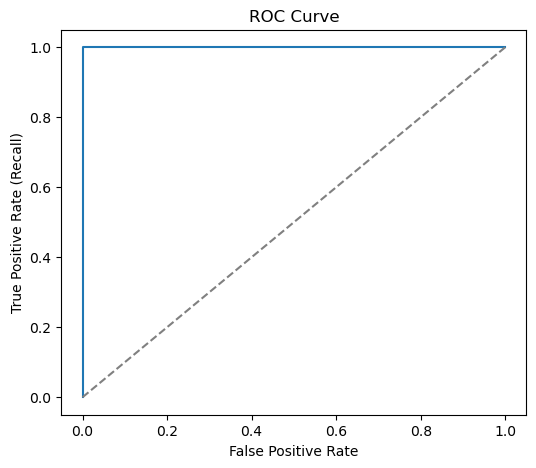

In [84]:
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")

In [88]:
joblib.dump({
    "model": model,
    "num_scaler": num_scaler,
    "cat_encoder": cat_encoder,
    "y_encoder": y_encoder,
    "num_columns": num_columns,
    "cat_columns": cat_columns
},"logistic_model_pipeline")


['logistic_model_pipeline']